In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/hk/ywl7_8hd7vx86n9j6zmy5dgc0000gn/T/ipykernel_92544/1154301116.py:6: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.measurement, and will be replaced in the string-lookup table.
  Base.prepare(engine, reflect=True)
/var/folders/hk/ywl7_8hd7vx86n9j6zmy5dgc0000gn/T/ipykernel_92544/1154301116.py:6: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.station, and will be replaced in the string-lookup table.
  Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
classes = Base.classes.keys()

# Print the list of classes
for cls in classes:
    print(cls)

measurement
station


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
# Query all rows from the Measurement table

session = Session(engine)

results = session.query(Measurement).all()

# Loop through the results and print data from each row
for row in results:
    print(row.date, row.prcp)


2010-01-01 0.08
2010-01-02 0.0
2010-01-03 0.0
2010-01-04 0.0
2010-01-06 None
2010-01-07 0.06
2010-01-08 0.0
2010-01-09 0.0
2010-01-10 0.0
2010-01-11 0.01
2010-01-12 0.0
2010-01-14 0.0
2010-01-15 0.0
2010-01-16 0.0
2010-01-17 0.0
2010-01-18 0.0
2010-01-19 0.0
2010-01-20 0.0
2010-01-21 0.0
2010-01-22 0.0
2010-01-23 0.0
2010-01-24 0.01
2010-01-25 0.0
2010-01-26 0.04
2010-01-27 0.12
2010-01-28 0.0
2010-01-30 None
2010-01-31 0.03
2010-02-01 0.01
2010-02-03 None
2010-02-04 0.01
2010-02-05 0.0
2010-02-06 0.0
2010-02-07 0.0
2010-02-08 0.0
2010-02-09 0.0
2010-02-11 0.0
2010-02-12 0.02
2010-02-13 0.01
2010-02-14 0.0
2010-02-15 0.0
2010-02-16 0.0
2010-02-17 0.0
2010-02-19 None
2010-02-20 0.03
2010-02-21 0.0
2010-02-22 0.0
2010-02-23 0.0
2010-02-24 0.0
2010-02-25 0.0
2010-02-26 0.0
2010-02-28 0.0
2010-03-01 0.01
2010-03-02 0.0
2010-03-03 0.0
2010-03-04 0.12
2010-03-05 0.08
2010-03-06 0.03
2010-03-07 0.0
2010-03-08 0.43
2010-03-09 0.06
2010-03-11 None
2010-03-12 0.0
2010-03-13 0.0
2010-03-14 0.0
20

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
# Query the most recent date from the Measurement table
most_recent_date = session.query(func.max(Measurement.date)).scalar()

# Print the most recent date
print(most_recent_date)

2017-08-23


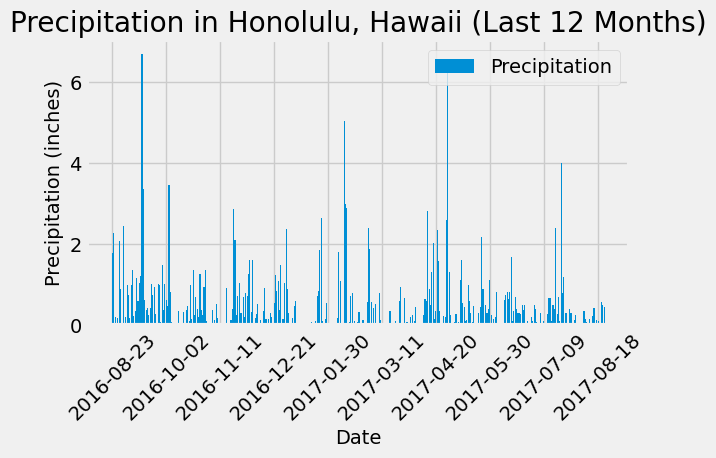

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year ago from the most recent date
most_recent_date = session.query(func.max(Measurement.date)).scalar()
one_year_ago = (pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)).strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores for the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Sort the DataFrame by date
precipitation_df.sort_values('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.bar(precipitation_df['date'], precipitation_df['precipitation'], label='Precipitation')
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation (inches)")
ax.set_title("Precipitation in Honolulu, Hawaii (Last 12 Months)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()








In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Calculate the summary statistics for precipitation data
summary_stats = precipitation_df['precipitation'].describe()

print(summary_stats)


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).scalar()

print(f'Total number of stations: {station_count}')

Total number of stations: 9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the stations and their counts in descending order
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get the most active station ID from the previous query
most_active_station = active_stations[0][0]

# Query to calculate lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs),
                                  func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).\
    first()

# Unpack the temperature statistics
lowest_temp, highest_temp, avg_temp = temperature_stats

print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {avg_temp}")

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


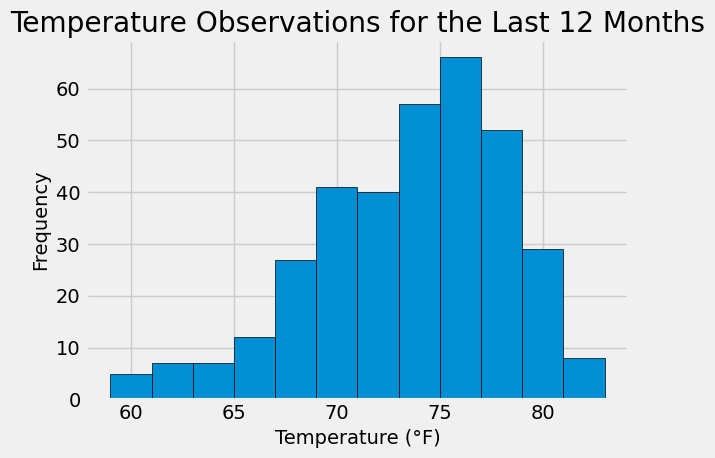

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Determine the date one year ago from the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).scalar()
one_year_ago = datetime.strptime(most_recent_date, '%Y-%m-%d') - timedelta(days=365)

# Query the temperature observations for the most active station within the last 12 months
temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results into a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Temperature'])

# Plot the results as a histogram
plt.hist(temperature_df['Temperature'], bins=12, edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observations for the Last 12 Months')
plt.tight_layout()
plt.show()



# Close Session

In [17]:
# Close Session
session.close()